#Ejercicio 1

En clase vimos que la función bits permite ver la representación binaria de números de punto flotante (Float64) o de enteros (e.g., Int64). En particular, para números de punto flotante, el primer bit es el signo, los siguiente 11 son el exponente y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.
La pregunta es ¿qué significa el exponente?

Los numeros de tipo flotante se componen de lo siguiente: la mantisa y el exponente.
La mantisa contiene los dígitos del número.
El exponente indica dónde se coloca el punto deciml en relación al inicio de la mantisa

#Ejercicio 2

¿Cuál es el número más chico que sumado a 1.0 me da algo distinto de 1.0?

In [1]:
ϵ = 1.0
ϵ_actual = 1.0
suma = 2.0

while suma > 1.0
    ϵ_actual = ϵ
    ϵ = ϵ/2.0
    suma = 1.0 + ϵ
end
return ϵ_actual

2.220446049250313e-16

¿Cuál es el número más chico que sumado a 10.0 me da algo distinto de 10.0?

In [2]:
ϵ = 1.0
ϵ_actual = 1.0
suma = 11.0

while suma > 10.0
    ϵ_actual = ϵ
    ϵ = ϵ/2.0
    suma = 10.0 + ϵ
end
return ϵ_actual

1.7763568394002505e-15

¿Cuál es el número más chico que *restado* a 1.0 me da algo distinto de 1.0?

In [3]:
ϵ = 1.0
ϵ_actual = 1.0
resta = 0.9

while resta < 1.0
    ϵ_actual = ϵ
    ϵ = ϵ/2.0
    resta = 1.0 - ϵ
end
return ϵ_actual

1.1102230246251565e-16

¿Cuál es el número más chico que *restado* a 10.0 me da algo distinto de 10.0?

In [3]:
ϵ = 1.0
ϵ_actual = 1.0
resta = 9.0

while resta < 10.0
    ϵ_actual = ϵ
    ϵ = ϵ/2.0
    resta = 10.0 - ϵ
end
return ϵ_actual

1.7763568394002505e-15

En Julia existe la función `eps` que da el número más pequeño que **sumado** a un número no da algo distinot. Podemos comparar nuestro resultado con esto  

In [4]:
eps(1.0)

2.220446049250313e-16

#Ejercicio 3

Define una functión llamada derivada1

In [5]:
function derivada1(x0,h,f)
    (f(x0 + h) - f(x0))/h
end

derivada1 (generic function with 1 method)

La aproximación es mala ya que el valor de h es fijo.

Ejemplo: sea la funcion x^2. Sabemos que su derivada es 2x.
Para poder ver el error, haremos la resta de dichas funciones.

In [6]:
f(x) = 16x^4+3x^3-x

f (generic function with 1 method)

In [7]:
g(x) = 64x^3+9x^2-1

g (generic function with 1 method)

In [8]:
using PyPlot

INFO: Loading help data...


In [9]:
xf = Float64[]
yf = Float64[]
for h in 0.0078125:0.0078125:0.125
    mi_error = derivada1(0,h,f)-g(0)
    push!(yf,mi_error)
    push!(xf,h)
end 

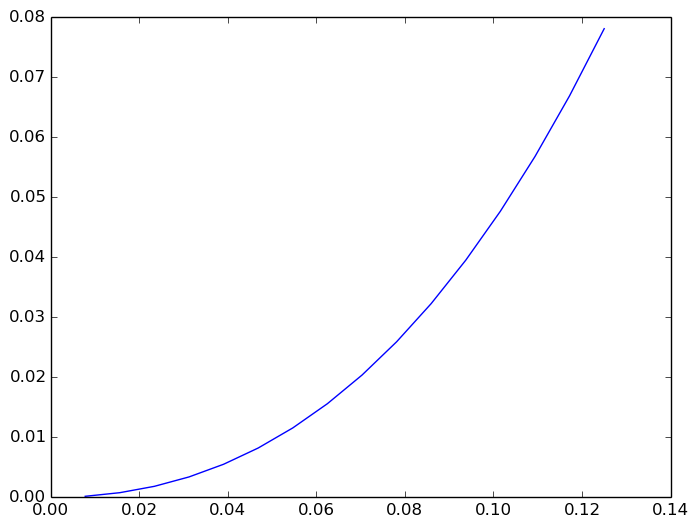

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f06c11ada90>

In [10]:
plot(xf,yf)

#Ejercicio 4

In [11]:
function derivada2(x0,h,f)
    (f(x0 + h) - f(x0 - h))/(2.0h)
end

derivada2 (generic function with 1 method)

###Ejemplo

In [12]:
f2(x) = 16x^4+3x^3-x

f2 (generic function with 1 method)

In [13]:
g2(x) = 64x^3+9x^2-1

g2 (generic function with 1 method)

In [14]:
x3f = Float64[]
y3f = Float64[]
for h in 0.0078125:0.0078125:0.125
    mi_error = derivada2(1,h,f2)-g2(1)
    push!(y3f,mi_error)
    push!(x3f,h)
end 

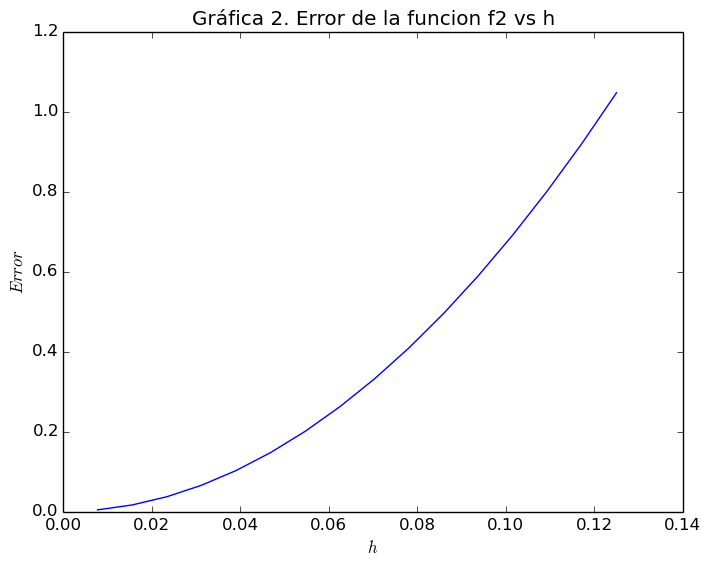

PyObject <matplotlib.text.Text object at 0x7f06c110f710>

In [15]:
plot(x3f,y3f)
xlabel(L"h")
ylabel(L"Error")
title("Gráfica 2. Error de la funcion f2 vs h")

En esta Gráfica 2 se puede ver que al aumentar el valor de $h$ aumenta el $error$.

¿Puedes explicar por qué la convergencia es mejor en este caso?

Para poder contestar esto, graficaremos ambos comportamientos en la misma gráfica

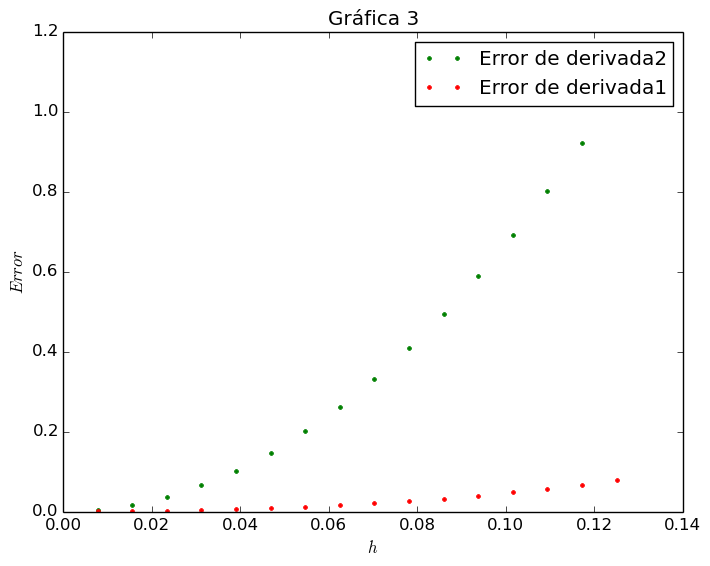

PyObject <matplotlib.text.Text object at 0x7f06880a2090>

In [16]:
plot(x3f,y3f, "g .", label = "Error de derivada2")
plot(xf,yf,"r .", label = "Error de derivada1")
legend()
xlabel(L"h")
ylabel(L"Error")
title("Gráfica 3")